In [ ]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn import preprocessing
from collections import Counter
import imblearn
from imblearn.under_sampling import RandomUnderSampler

import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [ ]:
def specificity_score(y_true, y_predict):
    from sklearn.metrics import confusion_matrix
    conf = confusion_matrix(y_true=y_true, y_pred=y_predict)
    return conf[0,0]/(conf[0,0]+conf[0, 1])

def opt_score(y_true, y_predict):
    
    target1_pro = 0.919271
    target0_pro = 1 - target1_pro
    
    opt_score = specificity_score(y_true, y_predict)*target1_pro*0.03 - (1-recall_score(y_true, y_predict))*target0_pro
    return (opt_score+0.1)*5

def opt_score2(y_true, y_predict, x_train):
    import numpy as np
    y_predict = np.array(y_predict)
    pos_index = (y_predict > 0.5).nonzero()
    neg_index = (y_predict < 0.5).nonzero()
    true_index = (y_true == 1).nonzero()
    false_index = (y_true == 0).nonzero()
    
    # specificity 
    s_index = np.intersect1d(neg_index, false_index)
    s_loss = x_train[s_index,3].sum() # annuty
    # (1-recall)
    invr_index = np.intersect1d(neg_index, true_index)
    invr_loss = x_train[invr_index, 2].sum() # credict
    
    return (s_loss - invr_loss)/x_train.shape[0]
    
def plot_confusion_matrix(y_test,result):
    plt_title = 'Stock Breach'

    from sklearn.metrics import confusion_matrix
    confmat = confusion_matrix(y_true=y_test, y_pred=result)
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xticks([0, 1], [0, 1])
    plt.yticks([0, 1], [0, 1])
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.title(plt_title)
    plt.tight_layout()
    plt.savefig('under_sampling_confusion_matrix.png', transparent = True)
    plt.show()


    acc = accuracy_score(y_test, result)
    f1 = f1_score(y_test, result)
    precision = precision_score(y_test, result)
    recall = recall_score(y_test, result)
    spe = specificity_score(y_test, result)
    opt = opt_score(y_test, result)
    print('accuracy =', acc)
    print('f1_score =', f1)
    print('precision =', precision)
    print('recall =', recall)
    print('specificity =', spe)
    print('opt_score =', opt)
    print()

In [ ]:
#data with customer and stock id
!gdown --id '1-7LiErNOtcSNb7myM_2C4gh3-fjPgTz1' --output train.csv
!gdown --id '1E5mZx25ZJ3gs1P45M2kccJUoDQOmO-Zc' --output test.csv

Downloading...
From: https://drive.google.com/uc?id=1-7LiErNOtcSNb7myM_2C4gh3-fjPgTz1
To: /content/train.csv
2.17GB [00:24, 89.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1E5mZx25ZJ3gs1P45M2kccJUoDQOmO-Zc
To: /content/test.csv
868MB [00:20, 41.7MB/s]


In [ ]:
#data without
!gdown --id '1OgPawokX8BE-laTOxmgKAzz9JYO45dRa' --output train.csv
!gdown --id '1wCBf0QTnEme4yvrVQez75_CaWtapDbSe' --output test.csv

Downloading...
From: https://drive.google.com/uc?id=1OgPawokX8BE-laTOxmgKAzz9JYO45dRa
To: /content/train.csv
1.77GB [00:13, 127MB/s]
Downloading...
From: https://drive.google.com/uc?id=1wCBf0QTnEme4yvrVQez75_CaWtapDbSe
To: /content/test.csv
705MB [00:13, 51.3MB/s]


In [ ]:
import numpy as np  
import pandas as pd
df1 = pd.read_csv("/content/train.csv")
df2 = pd.read_csv("/content/test.csv")

df1 = df1.drop(columns='Unnamed: 0')
df2 = df2.drop(columns='Unnamed: 0')

In [ ]:
df1 = df1.sort_values(['DATE_RANK'],ascending=True)
df1 = df1.drop(['Unnamed: 0.1','CUST_NO','STOCK_NO'],axis=1)
df2 = df2.sort_values(['DATE_RANK'],ascending=True)
df2 = df2.drop(['Unnamed: 0.1','CUST_NO','STOCK_NO'],axis=1)

In [ ]:
df2.columns

In [ ]:
#feature selection
drop_feat = [8,9,10,11,21,25,27,36,37,38,71]+ list(range(40,50)) +[51,59,60,61,65,66] + list(range(71,82))
drop_list=[]
for num in drop_feat: 
    num+=1
    drop_list.append(num)
drop_feat = drop_list

In [ ]:
train = df1.drop(df1.columns[drop_feat],axis=1)
test = df2.drop(df2.columns[drop_feat],axis=1)

col_name = df1.columns

df_newbie_train = train[train['OPEN_ACCT_YEAR']>2018]
df_newbie_test = test[test['OPEN_ACCT_YEAR']>2018]

df_old_train = train[train['OPEN_ACCT_YEAR']<2019]
df_old_train.shape

new_train = df_newbie_train
new_test = df_newbie_test
col_name = new_train.columns

print('The shape of df1 is:', new_train.shape)
print('The shape of df2 is:', new_test.shape)

The shape of df1 is: (1016488, 46)
The shape of df2 is: (583693, 46)


In [ ]:
new_train.to_csv('train_for_new.csv')
new_test.to_csv('test_for_new.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
new_train.to_csv('/content/drive/MyDrive/train_for_new.csv')
new_test.to_csv('/content/drive/MyDrive/test_for_new.csv')

In [ ]:
def normalize(train):
  train = train.drop(['DATE_RANK'],axis=1)
  train_norm = train.apply(lambda x: (x-np.mean(x)) / (np.max(x)-np.min(x)) )
  return train_norm

def build_train(train, pastday=60, futureday=5):
  x_train, y_train = [] , []
  for i in range(train.shape[0]-pastday-futureday):
    x_train.append(np.array(train.iloc[i:i+pastday]))
    y_train.append(np.array(train.iloc[i+pastday:i+pastday+futureday]['BREACH_IND']))

  return np.array(x_train),np.array(y_train)

def shuffle(X,Y):
  np.random.seed(10)
  randomList = np.arange(X.shape[0])
  np.random.shuffle(randomList)
  return X[randomList], Y[randomList]

def splitData(X,Y,rate):
  X_train = X[int(X.shape[0]*rate):]
  Y_train = Y[int(Y.shape[0]*rate):]
  X_val = X[:int(X.shape[0]*rate)]
  Y_val = Y[:int(Y.shape[0]*rate)]
  return x_train, y_train, x_val, y_val

def dataset(data):
    # read SPY.csv
    train = data
    # Normalization
    # train_norm = normalize(data)
    # build Data, use last 30 days to predict next 5 days
    x_train, y_train = build_train(train, 60, 5)
    # shuffle the data, and random seed is 10
    x_train, y_train = shuffle(x_train, y_train)
    return x_train , y_train


In [ ]:
x_train , y_train = dataset(remerge_train)
x_test , y_test = dataset(remerge_test)

# split training data and validation data
x_train, y_train, x_val, y_val = splitData(x_train, y_train, 0.1)

In [ ]:
 def data_process_mix(train,test): 


    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0,1))

    #seperate x y
    x_1 = train.drop('BREACH_IND', axis = 1)
    x_1 = scaler.fit_transform(x_1)
    y_1 = train['BREACH_IND']

    #seperate x y
    x_2 = test.drop('BREACH_IND', axis = 1)
    x_2 = scaler.fit_transform(x_2)
    y_2 = test['BREACH_IND']

    #Undersampling of data1
    print("Before undersampling: ", Counter(y_1))
    undersample = RandomUnderSampler(sampling_strategy = 0.001)
    x_under_train, y_under_train = undersample.fit_resample(x_1, y_1)
    print("After undersampling: ", Counter(y_under_train))

    #Undersampling of data2
    print("Before undersampling: ", Counter(y_2))
    undersample = RandomUnderSampler(sampling_strategy = 0.001)
    x_under_test, y_under_test = undersample.fit_resample(x_2, y_2)
    print("After undersampling: ", Counter(y_under_test))
    print("After undersampling: ", x_under_test.size)

    #combine two dataset
    x = np.append(x_under_train,x_under_test,axis=0)
    y = np.append(y_under_train,y_under_test,axis=0)

    #split train test
    x_train, x_test, y_train, y_test\
    = train_test_split(x, y, test_size=0.2, random_state=1) 

    #Validation
    x_train, x_val, y_train, y_val\
    = train_test_split(x_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

    return x_train,y_train,x_val,y_val,x_test,y_test

In [ ]:
x_train,y_train,x_val,y_val,x_test,y_test = data_process_mix(df1,df2)
print(x_train.shape,y_train.shape,x_val.shape,y_val.shape,x_test.shape,y_test.shape)

In [ ]:
def data_process_by_year(train,test):
  #make train data
  x_train = train.drop('BREACH_IND', axis = 1)
  x_train = preprocessing.scale(x_train)
  y_train = train['BREACH_IND']

  #make test data
  x_test = test.drop('BREACH_IND',axis=1)
  x_test = preprocessing.scale(x_test)
  y_test = test['BREACH_IND']

  #減少training sample=
  undersample = RandomUnderSampler(sampling_strategy = 0.001)
  x_train, y_train = undersample.fit_resample(x_train, y_train)

  #減少testing sample
  undersample = RandomUnderSampler(sampling_strategy = 0.001)
  x_test, y_test = undersample.fit_resample(x_test, y_test)

  #Validation
  x_train, x_val, y_train, y_val\
  = train_test_split(x_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

  return x_train, x_val, y_train, y_val , x_test , y_test

In [ ]:
x_train, x_val, y_train, y_val , x_test , y_test = data_process_by_year(new_train,new_test)
print(x_train.shape,y_train.shape,x_val.shape,y_val.shape,x_test.shape,y_test.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(44294, 45) (44294,) (14765, 45) (14765,) (21021, 45) (21021,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
remerge_train = np.c_[x_train,y_train]
remerge_test = np.c_[x_test,y_test]

In [ ]:
x_train , y_train = dataset(remerge_train)
x_test , y_test = dataset(remerge_test)

AttributeError: ignored

In [ ]:
# split training data and validation data
x_train, y_train, x_val, y_val = splitData(x_train, y_train, 0.1)

# LSTM Model

In [ ]:
data_dim = 1
timesteps = 45
num_classes = 2

x_train = np.reshape(x_train, (x_train.shape[0], timesteps , data_dim))
x_val = np.reshape(x_val, (x_val.shape[0], timesteps , data_dim))
x_test = np.reshape(x_test, (x_test.shape[0], timesteps , data_dim))


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM ,Activation

# Build the LSTM model
model = Sequential([
         LSTM(128, return_sequences=True, input_shape= (timesteps, data_dim)),
         LSTM(64, return_sequences=False),
         Dense(25),
         Dense(1),
])

# Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


Training

In [ ]:
# Train the model
# model.fit(x_train, y_train, batch_size=16, epochs=10, validation_data=(x_val,y_val),callbacks=[callback])

model.fit(  
    x_train, y_train, 
    batch_size = 32, 
    epochs = 10, 
    validation_split = 0.2, 
    validation_freq = 2 
)

Epoch 1/10
1108/1108 [==============================] - 104s 76ms/step - loss: 0.0126 - accuracy: 0.9992
Epoch 2/10
1108/1108 [==============================] - 89s 81ms/step - loss: 0.0163 - accuracy: 0.9989 - val_loss: 0.0192 - val_accuracy: 0.9988
Epoch 3/10
1108/1108 [==============================] - 82s 74ms/step - loss: 0.0166 - accuracy: 0.9989
Epoch 4/10
1108/1108 [==============================] - 88s 79ms/step - loss: 0.0128 - accuracy: 0.9992 - val_loss: 0.0192 - val_accuracy: 0.9988
Epoch 5/10
1108/1108 [==============================] - 82s 74ms/step - loss: 0.0149 - accuracy: 0.9990
Epoch 6/10
1108/1108 [==============================] - 88s 79ms/step - loss: 0.0191 - accuracy: 0.9988 - val_loss: 0.0192 - val_accuracy: 0.9988
Epoch 7/10
1108/1108 [==============================] - 86s 77ms/step - loss: 0.0154 - accuracy: 0.9990
Epoch 8/10
1108/1108 [==============================] - 88s 80ms/step - loss: 0.0107 - accuracy: 0.9993 - val_loss: 0.0192 - val_accuracy: 0.9988

Testing

In [ ]:
# Test the model
predictions = model.predict(x_test)

from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
predictions = scaler.fit_transform(predictions)

predictions


array([[0.81478286],
       [0.72760755],
       [0.7552387 ],
       ...,
       [0.63833433],
       [0.8075815 ],
       [0.8339121 ]], dtype=float32)

In [ ]:
max = np.max(predictions)
min = np.min(predictions)
mean = np.mean(predictions)

def minmax(x,mean,max,min):
  prb_list = []
  for i in x:
    x_bar = abs(i - mean/(max-min))*100
    prb_list.append(x_bar)
    if x_bar<0.5 and x_bar>0.3:
      safe = '安全，但須留意'
    elif x_bar<0.3 and x_bar>0.1:
      safe = '在安全範圍之內'
    elif x_bar<0.1 and x_bar>0:
      safe = '非常安全'
    else:
      safe = '有風險！請審慎評估'
  
  return np.round(prb_list,decimals=4), safe

prob_breach, safe = minmax(predictions,mean,max,min)

print('您違約的機率是: {}％'.format(np.max(prob_breach)))
print('我們認為您這筆交易{}'.format(safe))

您違約的機率是: 69.64800262451172％
我們認為您這筆交易有風險！請審慎評估


0.69647956

In [ ]:
np.save('my_array2', x_test)

In [ ]:
new = []
for i in predictions:
  if i >0.75:
    new.append([1])
  else:
    new.append([0])

new = np.array(new)

In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

0.7182709446873597

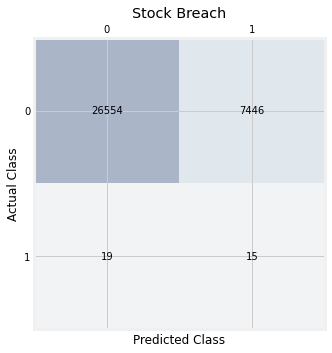

accuracy = 0.7806605159546336
f1_score = 0.00400266844563042
precision = 0.002010454362685967
recall = 0.4411764705882353
specificity = 0.781
opt_score = 0.3821262741205881



In [ ]:
plot_confusion_matrix(y_test,new)

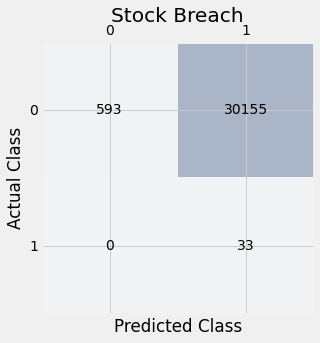

accuracy = 0.020337221012962543
f1_score = 0.002183911849376262
precision = 0.001093149595865907
recall = 1.0
specificity = 0.019285807206972812
opt_score = 0.5026593324915442



In [ ]:
# Test the model
predictions = model.predict(x_val)
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
predictions = scaler.fit_transform(predictions)

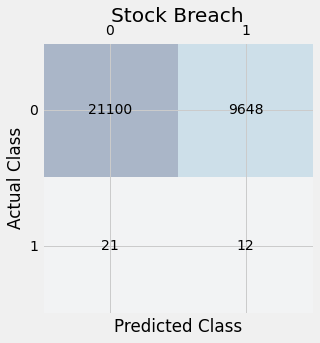

accuracy = 0.6858776517981872
f1_score = 0.0024760136180748994
precision = 0.0012422360248447205
recall = 0.36363636363636365
specificity = 0.6862234942110056
opt_score = 0.33775880366202665



In [ ]:
new = []
for i in predictions:
  if i >0.7:
    new.append([1])
  else:
    new.append([0])

new = np.array(new)

plot_confusion_matrix(y_val,new)